# Exoplanets and the Search for Chemical Signature of Life using Machine Learning

### For a better experience, please view this file using jupyter notebooks, not directly in GitHub   (https://www.anaconda.com/distribution/)



#####                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Over 4000 exoplanets in nearly 3000 solar systems have been discovered so far. Is there biological life on any of them? If so how do we eventually detect it? One possible way to do so would be to look for chemical biosignatures of life. 

A biosignature could be an element, isotope, molecule or a phenomenon that provides scientific evidence of past or present life. For example, large amounts of oxygen and small amounts of methane are generated by life on Earth. Learning more about the chemical composition of atmospheres of exoplanets will help us identify interesting exoplanetary candidates for further investigation.

So how do we study chemical composition of exoplanets? This is where the Atmospheric Remote-sensing Infrared Exoplanet Large-survey (ARIEL) Telescope comes in. ARIEL was selected as the fourth medium-class mission in European Space Agency’s (ESA) Cosmic Vision programme. During its 4-year mission, ARIEL will study what exoplanets are made of, how they formed and how they evolve, by surveying a diverse sample of about 1000 extrasolar planets, simultaneously in visible and infrared wavelengths. It is the first mission dedicated to measuring the chemical composition and thermal structures of hundreds of transiting exoplanets, enabling planetary science far beyond the boundaries of the Solar System.

#### Big Universe, Bigger Data, Small Community

More telescopes mean more opportunities to learn about the universe. But telescopes also generate a massive amount of data. We need to sift through and analyze the data to extract patterns and other important features. While data about our universe is increasing exponentially, the astronomy community is not. It means we need to rely more on complex algorithms and machine learning models to extract information from raw data. 

Building a community of people who are familiar with data being generated by the telescopes and can come up with accurate prediction models is essential to accelerate discoveries. Having a wider community and opening up data analysis to crowdsourcing would mean new sets of eyes to look upon the same data and make new discoveries which may have been overlooked.


#### Machine Learning and ARIEL MissionSpace Data

Machine Learning algorithms can help us analyze massive amount of data being generated by Earth and Space based Telescopes, such as ARIEL Space Mission of the European Space Agency or the Transiting Exoplanet Survey Satellite (TESS) Mission ot the NASA. 

In this tutorial, we will focus on the ARIEL Space Mission. We will use the simulated data provided by the ARIEL Telescope through the ARIEL Machine Learning Data Challenge. https://ariel-datachallenge.azurewebsites.net/

Coure participants will be given a database of light curves for some of the exoplanets in 55 different wavelengths. Why so many wavelengths? Molecules in atmosphere absorb more or less light depending on the wavelength of the photon interacting with the molecule. For example, if we are searching for water, we can look at wavelength range of light where water is a strong absorber. Therefore, we expect fewer photons to reach us when light of that wavelength from the parent star passing through the atmosphere of the exoplanet transiting it. 

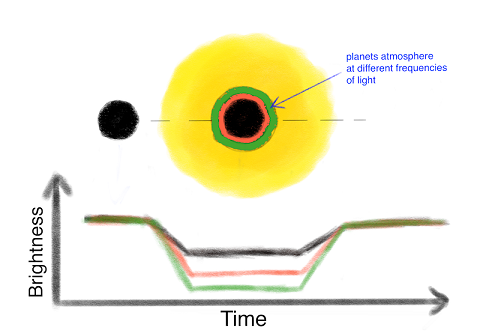

### The first step will be to import the neccesary libaries

In [ ]:
# If you do not have these libaries installed, you can run

!conda install matplotlib
!conda install tensorflow

#For tensorflow-gpu installation, please visit https://www.tensorflow.org/install/gpu
#Alternativly, run the above commands in anaconda prompt (without the !)

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import math

In [2]:
import tensorflow as tf
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding,SimpleRNN, Input, concatenate, GRU
from keras.models import Model

Using TensorFlow backend.


## PART 1: DATA LOADING, PREPARATION, AND VISUALIZATION

### We will start by loading the data into our environemnt. The data can be downloaded at: https://drive.google.com/open?id=1vpMe8u1FGJnd6lIKe77n0dFb0nVZSYAI   (9 GB zip file, full size 23 GB)


#### <font color=black>We will create 3 lists:</font>

  
#### <font color=red>Training Database (Input)</font>
#####  <font color=red>1: "train_wavelengths", which contains the light curves from the star as an exoplanet passes in front of it, in 55 different wavelengths, represented by a sequence of 300 data points</font>

##### <font color=red>2: "train_numerical", which contains 6 parameters about the star which the planet orbits around: [star temperature, star logg, star_radius, star_mass, star_k_magnitude, star_period]</font>


#### <font color=blue>Training Database (Output)</font>
##### <font color=blue>3: "train_params", which contains the ground truth value of the rato between the radius of the star to the radius of the planet for each of the 55 wavelengths in all of the exoplanets in our database(5000) . This is what we need to predict based on the previous 2 lists</font>

### The following code will be loading over 20 GB of data, and may take up to 1 hour to complete. To load a smaller amount of data, change the value of 'amount' in the beggining of the code

#### (MAX Amount = 100000)






In [3]:
amount = 5000
#### - Defining our 3 lists where we will store our data - ####
train_numerical = []
train_wavelengths = []
train_params = []


###############################################################################################################################
###############################################################################################################################

print()
print('1. LOADING TRAIN INPUT DATA ...')
print()
directory = r"C:\Users\...\data\noisy_train"  #Instert the path to the "Train Data" folder within the iverted commas

for filename in ((os.listdir(directory)[:amount])):    #Looking at every txt file conatining data in our folder
    
    path_to_file = os.path.join(directory, filename)  # finds path to current txt file
    data = open(path_to_file, 'r')                    # extracts all data from the file
    
    
    temp = []
    for i in data:     # puts every element of data into list format
        temp.append(i)
        
    a = temp[:6]    #takes the first 6 elements, representing the 6 stellar parameters (numerical data)
    b = temp[6:]    #takes rest of data as the 55 wavelengths for which the current planet was measured in
    
    train_numerical.append(a)    #adds the first 6 stellar parameters to our "train_numericaL" List
    
    
    
    temp2 = []   #Following loop splits up the 55 wavelengths to create 55x300 data array, representing the 55 wavelengths,
                 #each containing 300 datapoints, and adds it to our "train_wavelengths" list
    for i in b:
        c = []
        
        i = i.split('\t')
        i[-1] = i[-1][:-1]
    
        c = []
    
        for ii in i:
            c.append(float(ii))
        temp2.append(c)
        
    train_wavelengths.append(np.transpose(np.array(temp2)))
    
    
###############################################################################################################################
###############################################################################################################################   

print()
print('2. LOADING TRAIN PARAMETERS DATA ...')
print()

directory = r'C:\Users\...\data\params_train' #Instert the path to the "Train Param" folder within the iverted commas

for filename in (os.listdir(directory)[:amount]):     
    p = os.path.join(directory, filename)
    data = open(p, 'r')
    temp = []
    for i in data:
        temp.append(i)
    
    f = temp[-1]
    f = f.split('\t')
    f[-1] = f[-1][:-1]
    
    t = []                                                                             
    
    for i in f:
        t.append(float(i))
    
    train_params.append(np.array(t))
    
    
###############################################################################################################################
###############################################################################################################################


#Normalization of data to keep numerical stellar data between 0 and 1
print()
print('3. NORMALIZING NUMERICAL TRAIN DATA ...')
print()

tnum1 = train_numerical
train_numerical = []

for item in tnum1:
    temp = []
    temp.append((float(item[0][13:-1]))/1000)
    temp.append((float(item[1][13:-1]))/10)
    temp.append((float(item[2][12:-1]))/10)
    temp.append((float(item[3][13:-1]))/10)
    temp.append((float(item[4][14:-1]))/10)
    temp.append((float(item[5][10:-1]))/10)
    train_numerical.append(np.array(temp))
    
print()
print("DONE LOADING DATA")


### - Break data into train and test dataset - ###

temp1 = train_numerical
temp2 = train_wavelengths
temp3 = train_params


# Randomizing the dataset
combined = list(zip(temp1, temp2, temp3))
random.shuffle(combined)
temp1[:], temp2[:], temp3[:] = zip(*combined)

xv = int(0.75*amount)
# Split data into train and test
train_numerical = temp1[:xv]
train_wavelengths = temp2[:xv]
train_params = temp3[:xv]

test_numerical = temp1[xv:]
test_wavelengths = temp2[xv:]
test_params = temp3[xv:]
    


1. LOADING TRAIN INPUT DATA ...


2. LOADING TRAIN PARAMETERS DATA ...


3. NORMALIZING NUMERICAL TRAIN DATA ...


DONE LOADING DATA


In [4]:
print("The lenght of train_wavlengths is: "+str(len(train_wavelengths)))
print("The lenght of train_numerical is: "+str(len(train_numerical)))
print("The lenght of train_params is: "+str(len(train_params)))
print()
print("The lenght of test_wavlengths is: "+str(len(test_wavelengths)))
print("The lenght of test_numerical is: "+str(len(test_numerical)))
print("The lenght of test_params is: "+str(len(test_params)))

The lenght of train_wavlengths is: 750
The lenght of train_numerical is: 750
The lenght of train_params is: 750

The lenght of test_wavlengths is: 250
The lenght of test_numerical is: 250
The lenght of test_params is: 250


### Now, we will visualize the data to better understand what model to create to solve the problem

 
<font color=red>1. We have 2 training input datasets. The first one, "train_wavelengths" can be expresses as a 3 dimensional array. The first dimension being all the 5000 planets for which a light curve had been recoorded. The second dimension is the 55 wavelengths for which the light curve was measured in. The 3rd and last dimension is the 300 datapoints that make up the light curves</font>


##       

<font color=red>2. The second one, is "train_numerical". This can be expressed as a 2 dimensional array, with first dimension being the same as the previous one: 5000 planets. The second dimension is the 6 stellar parameters</font>



#    
<font color=blue>3. We have a single output/param datset. It is also a 2 dimensional array, with the first demension, as always, the 5000 planets. The second one would be 55 planet_radius to star_radius ratios, one for each wavelength. These are the values we need to predict</font>


#### Getting shape of our data:

In [5]:
print("The shape of train_wavlenghts is: "+str(np.shape(train_wavelengths)))
print("The shape of train_numerical is: "+str(np.shape(train_numerical)))
print("The shape of train_params is: "+str(np.shape(train_params)))

The shape of train_wavlenghts is: (750, 300, 55)
The shape of train_numerical is: (750, 6)
The shape of train_params is: (750, 55)


### Let us plot the planet to star radius ratio over 55 wavelengths for the first training example

Text(0, 0.5, 'planet_radius / star_radius')

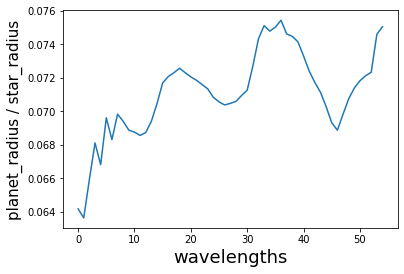

In [6]:
plt.plot(train_params[0])
plt.xlabel('wavelengths', fontsize = 18)
plt.ylabel('planet_radius / star_radius', fontsize = 15)

### We will now plot this for all of the training examples
#### We can observe that when plotted, all the curves fall into around a dozen different categories. All of the exoplanets oberved in each category have simmilar characterestics.

Text(0, 0.5, 'planet_radius / star_radius')

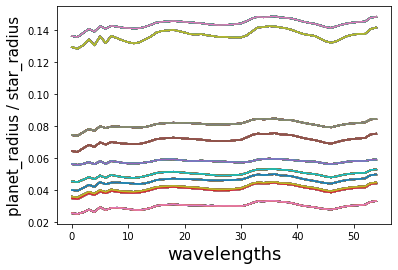

In [7]:
for graph in train_params[:(amount)]:
    plt.plot(graph)
plt.xlabel('wavelengths', fontsize = 18)
plt.ylabel('planet_radius / star_radius', fontsize = 15)

## PART 2 | CREATE A PREDICTIVE MODEL AND FIT IT WITH OUR DATA

### What Supervised Algorythm to Use?

##### Supervised learning: machine learning task of learning a function to map inputs to output(s). It learns this by training on a train dataset containing examples lists of inputs and their corresponding outputs.

1. Decision Tree
2. Random Forrest
3. Linear/Polynomial Regression
4. <b/>Neural Networks
#### ....


### What are Neural Networks?

#### General Definitions:

1. "A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operate"
###      
2. "Artificial neural networks or connectionist systems are computing systems that are inspired by, but not identical to, biological neural networks that constitute animal brains. Such systems "learn" to perform tasks by considering examples, generally without being programmed with task-specific rules"
###      
3. Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

##       

### Supervised Neural Network Architecture:

<B/>1. INPUT LAYER:</b> PROVIDES NEURAL NETWORK WITH DATA FROM REAL WORLD

<B/>2. HIDDEN LAYERS:</b> LAYERS CONTAINING NEURONS TO LEARN RELATIONSHIP BETWEEN INPUT AND OUTPUT

<B/>3. OUTPUT LAYER:</b> COMBINES OUTPUTS FROM HIDDEN LAYERS INTO FINAL OUTPUT

###      
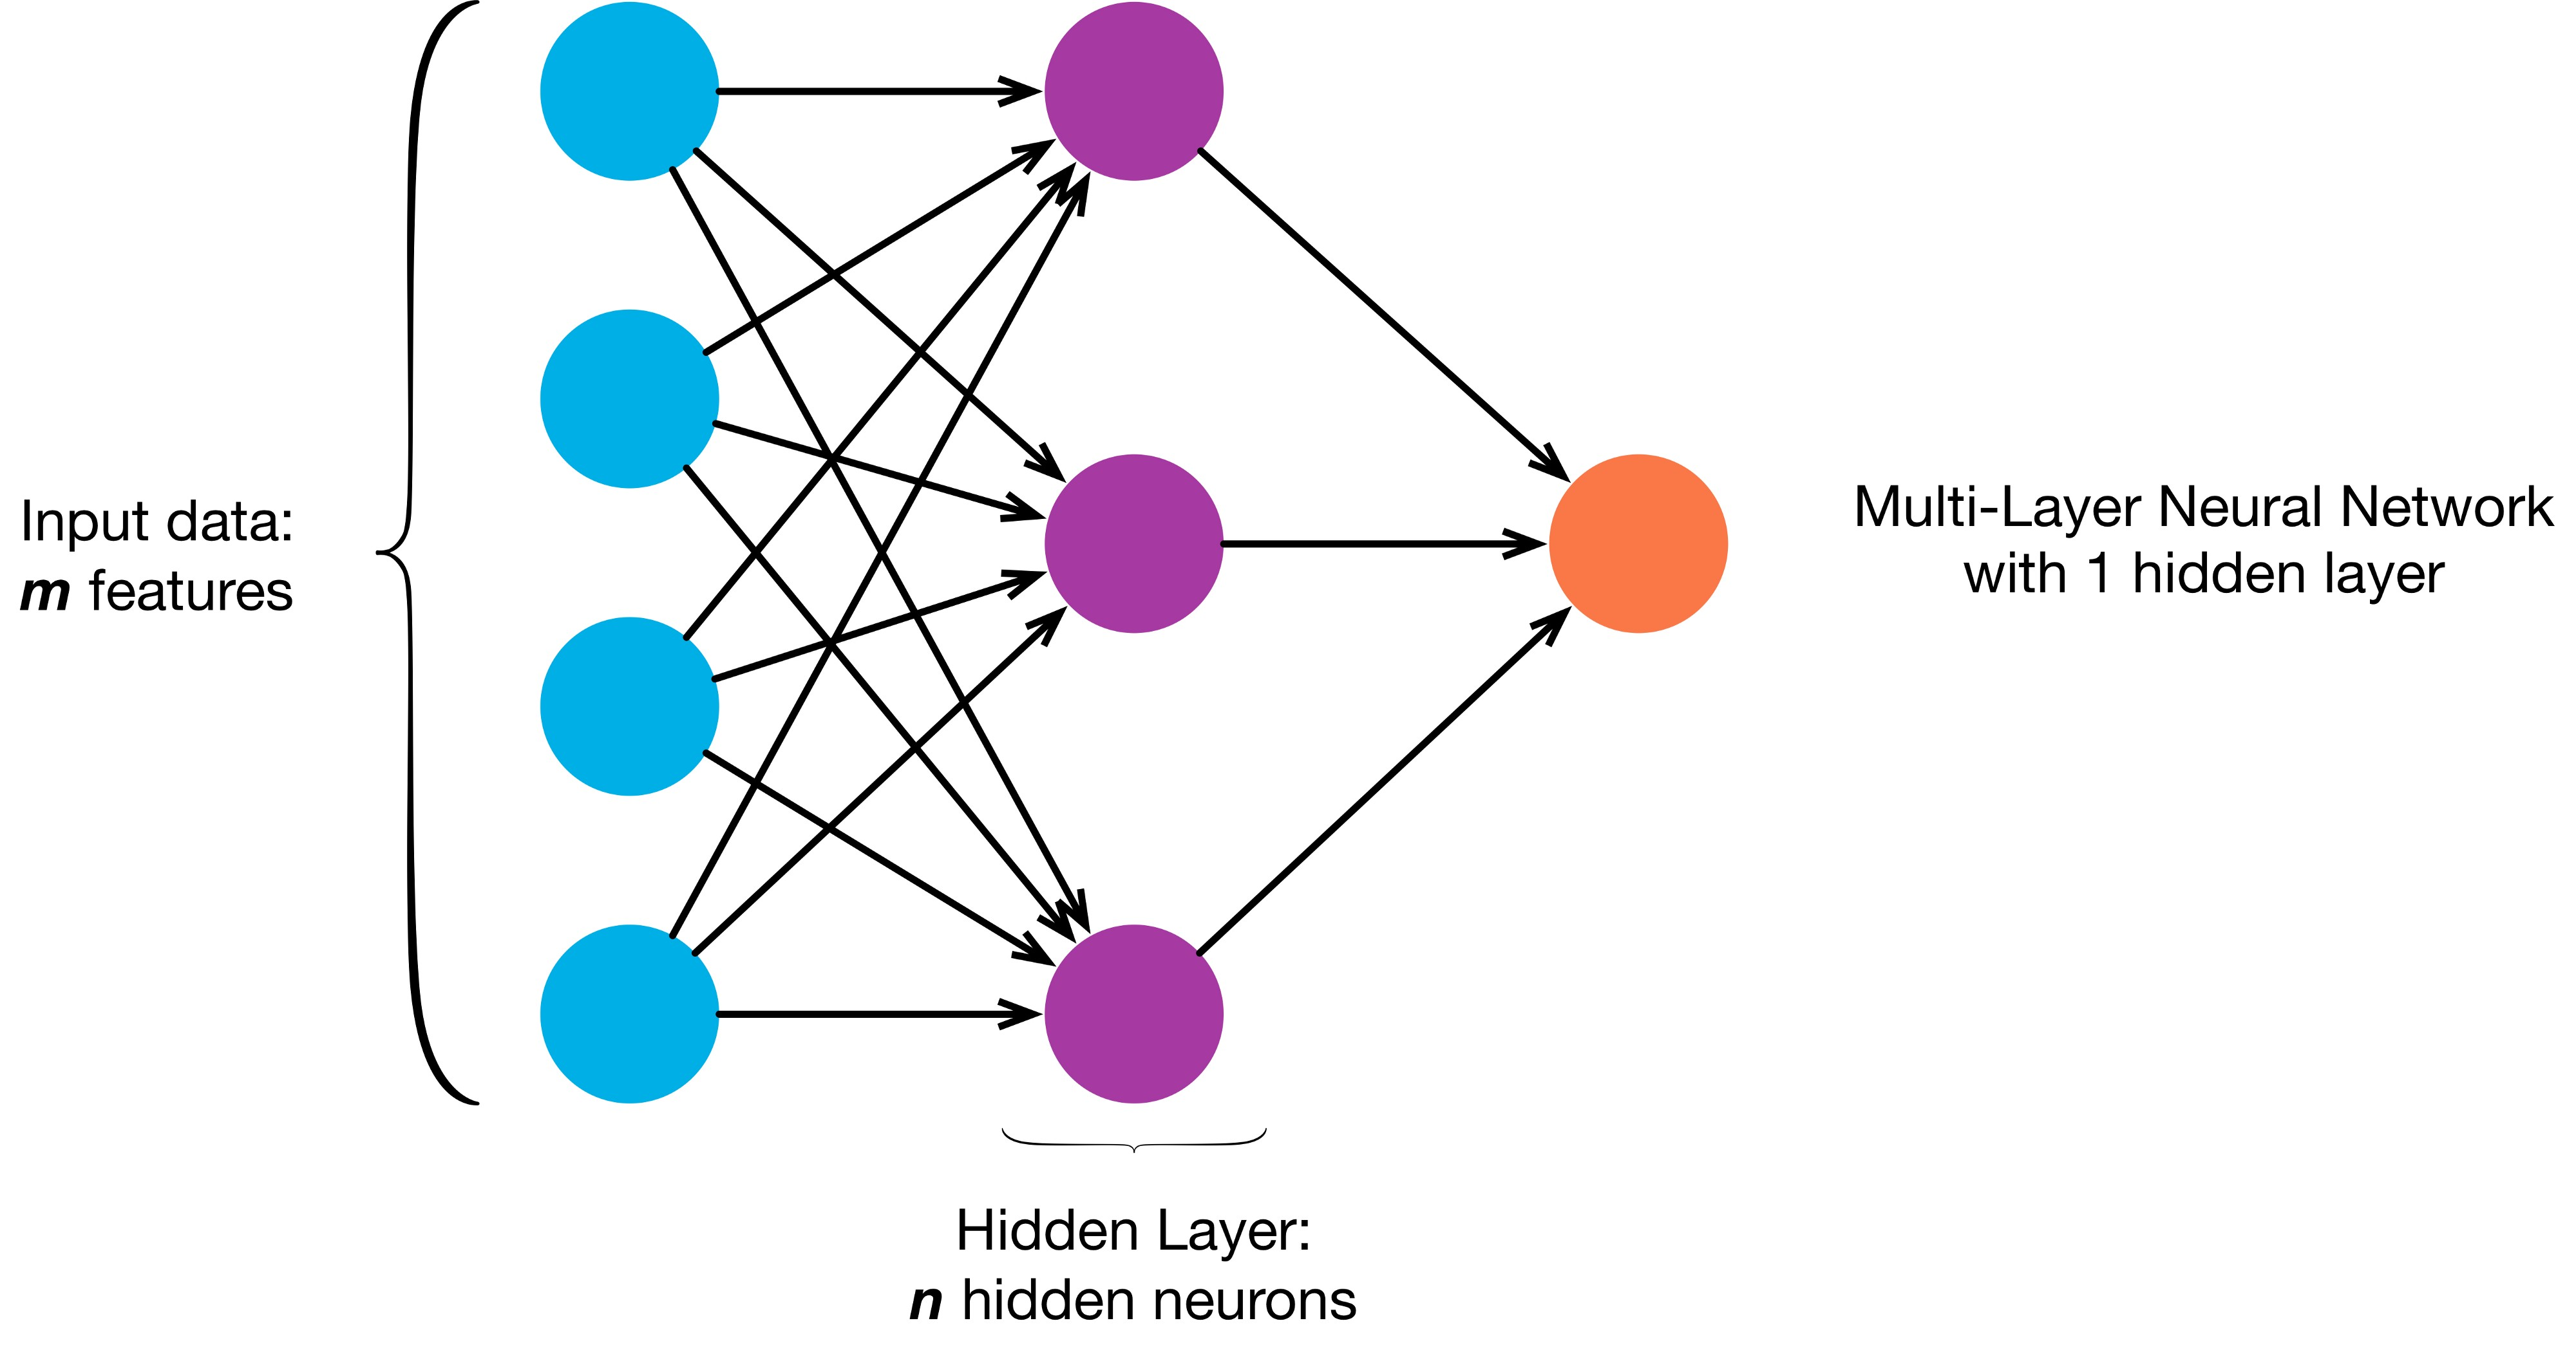


#      


### 2 Neuron Types:
##   
<b/>1. Simple Perceptron (Used when handling Numerical data)</b>
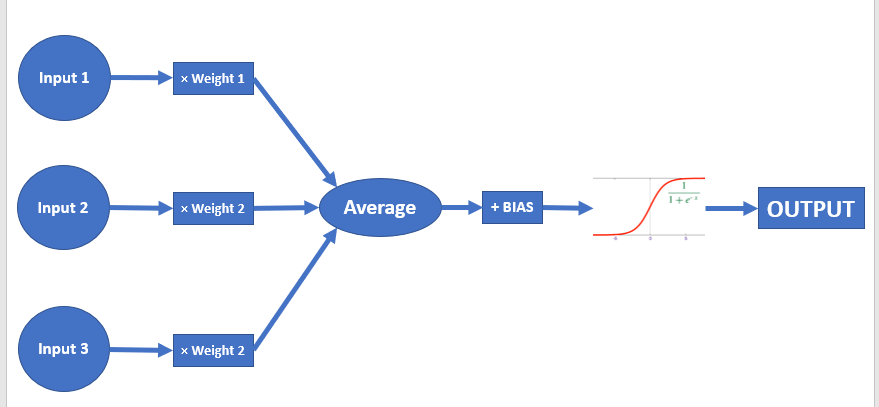

#         

<b/>2. Reccurent Neural Network Cell (Used when handling time-series or sequential data)</b>
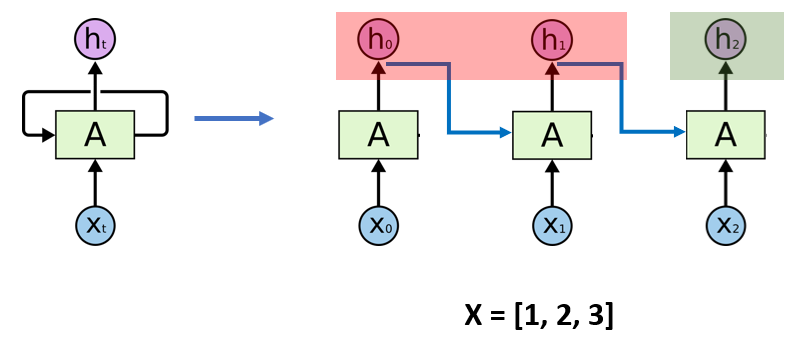

## Creating the Model

### Below is the model that I created to fit the data

#### We have 2 types of input data: numerical data, and sequential data. 

#### Our numerical data consists of the 6 stellar parameters (train_numerical). 
#### Our sequential data consists of 55 sequences. Each sequence, representing a different wavelength (train_wavelengths)

#### To ensure that the model reached a maximal accuracy, it needed to utilize both data types. Therefore,  decided to have two neural networks. 

#### The first one would take the sequential data as an input. As it would be analyzing data where the order matters, also known as time series data, it was consisted of several LSTM layers. An LSTM cell is a type of RNN cell, which means it can analze such sequences.

#### The second model would take the numerical data. As it would be analyzing numerical data, It was made up of several feed forward layers consisting of simple perceptrons. This is called a Feed Forward Neural Network.

Then, those 2 models would concatenate into a third model, which would merge the 2 models to give the planet radius to star radius ratios for every of the 55 wavelengths
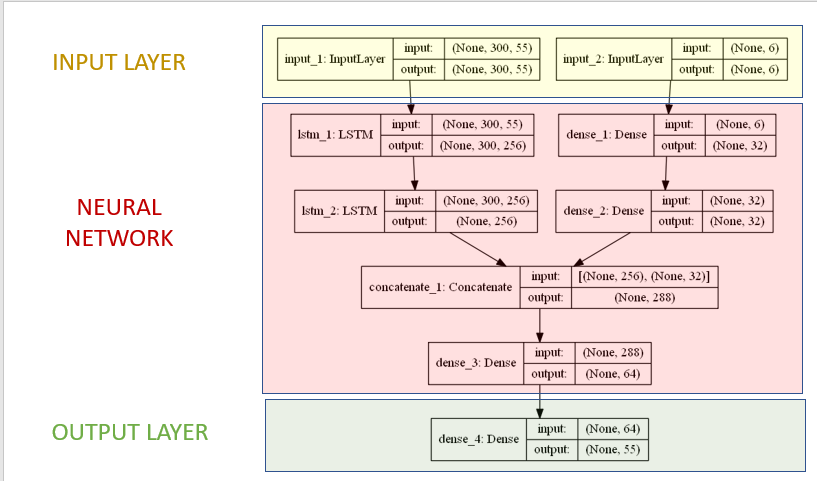



In [8]:
##############################################################################################
##############################################################################################    

num_time_steps = 300    #There are 300 points in each curve
num_inputs = 55         #There are 55 such curves (55 wavelenths)
num_vals =6             #6 stellar parameters


################################# - MODEL 1 - ####################################

inputx = Input(shape = (num_time_steps, num_inputs))  #Input #1, taking light curve data

x1 =  LSTM(256, activation= 'relu',return_sequences=True)(inputx)  #First LSTM layer (256 neurons)

x2 =  LSTM(256, activation= 'relu',return_sequences=False)(x1)     #Second LSTM layer (256 neurons)

modelx = Model(inputs=inputx, outputs=x2)  # Output of first model


################################ - MODEL 2 - #####################################

inputy = Input(shape = (num_vals,))  #Input #2, taking 6 stellar parameters

y1 =  Dense(32, activation='relu')(inputy)  #First DENSE layer (32 neurons)

y2 =  Dense(32, activation='relu')(y1)      #First DENSE layer (32 neurons)

modely = Model(inputs=inputy, outputs=y2)   # Output of second model


################################ - COMBINED MODEL - ##############################

combined = concatenate([modelx.output, modely.output])  #Concatenating first and second model

z = Dense(64, activation="relu")(combined)  #Third DENSE layer, analysing combined results


z = Dense(55, activation="relu")(z)  # FINAL OUTPUT LAYER (55 outputs)

model = Model(inputs=[modelx.input, modely.input], outputs=z) #DEFINING FINAL MODEL'S INPUTS AND OUTPUT (2 Inputs, 1 Output)

##############################################################################################
##############################################################################################



In [9]:
#Calling model.summary() will give you a diagram of the layers used in the neural network above

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 55)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 300, 256)     319488      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           224         input_2[0][0]                    
____________________________________________________________________________________________

### Training the Model

#### The model we have created is a supervised learning model. This means that it learns the relationship between input data and output data based on past/historic examples.

#### For it to learn the relationship, it goes through a training phase, where it goes through the whole dataset several times to determine the most accurate and strongest function to predict the outputs based on the inputs

#### TRAINING PHASE:
  1. Randomly Breaks the dataset in to multiple batches (8, 16, 32, 64 ... datapoint per batch)
  2. For each batch: looks through all datapoints and updates weights to best accomodate the data
  3. Break the data into batches with new data combinations
  4. Train again with new batches
  5. Repeat until satisfied with model accuracy
  
#### Each iteration where it re-creates batches and trains on the whole dataset (through batches)  is called an "Epoch"

#### Before training, we compile the model with an optimizer. The optimizer sets a learning rate based on your neural network architecture and loss. The loss we use is MSE. This will be calculated based on the predicted planet - star radius ratio over all the 55 wavelenghts versus the ground truth ratios for the same wavlenghts. It also sets the method used to update the neural network's weights


In [10]:
### Model Compilation ###
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
input_data = [np.array(train_wavelengths), np.array(train_numerical)] # Putting together the input training data
val_data = [np.array(test_wavelengths), np.array(test_numerical)] # Putting together the input validation
data
model_history = model.fit(input_data, np.array(train_params), batch_size = 64, epochs = 10, validation_data = [val_data, np.array(test_params)])

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 31s 42ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 2/10
750/750 [==============================] - 30s 40ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 3/10
750/750 [==============================] - 29s 39ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 4/10
750/750 [==============================] - 30s 39ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 5/10
750/750 [==============================] - 29s 39ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 6/10
750/750 [==============================] - 30s 40ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 7/10
750/750 [==============================] - 30s 39ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 8/10
750/750 [==============================] - 30s 40ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 9/10
750/750 [==============================] - 30s 40ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 10/10
750/750 [===============

Text(0, 0.5, 'MSE')

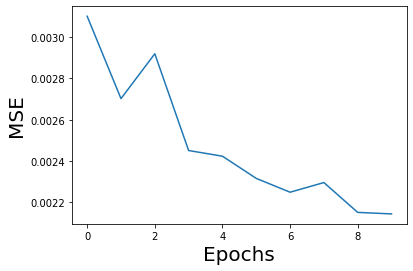

In [12]:
#plot loss over time
plt.plot(model_history.history['val_loss'])
plt.xlabel("Epochs", fontsize = '20')
plt.ylabel("MSE", fontsize = '20')

In [34]:
#If you want to load the pretrained model, download at https://drive.google.com/drive/folders/1zA1FFAWBc_i2wgQhLlGXDpxQlGxrLedw
model.load_weights(r'C:\Users\...\model') #Load the pretrained model at specified path

In [35]:
### - Test and Train accuracy - ###

test_acc = model.evaluate([np.array(test_wavelengths), np.array(test_numerical)], np.array(test_params))


train_acc = model.evaluate([np.array(train_wavelengths), np.array(train_numerical)], np.array(train_params))

print()
print("Train Accuracy (MSE) ==> "+str(train_acc))
print()
print("Test Accuracy (MSE) ==> "+str(test_acc))


750/750 [==============================] - 8s 11ms/step

Train Accuracy (MSE) ==> 0.000543171940293784

Test Accuracy (MSE) ==> 0.0006625848091207445


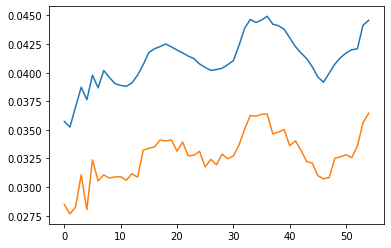

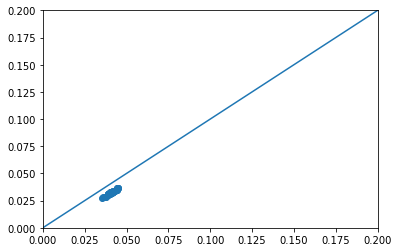

In [36]:
### Manualy taking a look at ground truth values compared to values predicted by model
n = random.randint(0,len(test_wavelengths)-1)
model_prediction = model.predict(      [     np.array([test_wavelengths[n]]), np.array([test_numerical[n]])     ]         )

model_prediction[0]


ground_truth = test_params[n]

plt.plot(ground_truth)
plt.plot(model_prediction[0])
plt.show()

    
        
        
plt.scatter(ground_truth,model_prediction[0] )
plt.xlim(0,0.2)
plt.ylim(0,0.2)
plt.plot(np.linspace(0,0.2), np.linspace(0,0.2))
plt.show()

## <u/>PART 3 | EXERCISE: MAKE YOUR OWN IMPROVED MODEL

### Now you will build upon this basic model to improve it's test/train accuracy or make a completely new one

#### </b>Different parameters we can change in the model:</b>

1. The first one is the batch size, which was prevously 64.  By increasing it, the neural network will train faster, as it has to adjust its weights less often. But It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize (your model's ability to adapt properly to new, previously unseen data)


2. By decreasing the batch size, the neural network takes more time to train. Also, with a bigger batch size, its getting the general idea of the data every batch. In the case of a small batch size, our neural network will wander a lot as is getting a significantly different idea of the data it has to fit for each time it looks at a new batch. Thus, the accuracy of the network will not be consistant. One way you could keep your model more stable in the case of a lower learning rate is to decrease the learning rate


3. The learning rate is the rate at which the neural network will learn on new data is sees. For example, with a lower learning rate, if in the second batch of data it sees or learns something completely oposite to what it saw in the first batch, it will not make a very significant change to its weights, while with a higher learning rate, the model may overwrite pertinant information it has learnt in the first batch to perform better only to the kind of data in the second batch


4. will go through the whole training dataset. It takes several epochs for the neural network to achieve its full potential


5. The previous parameters are ones that do not affect the actual architecture of the neural network. To change the architecture of the neural networks, there are 3 things you can do:

    a. Change the number of neurons the layers of the neural network
    
    b. Add more layers to different parts of the neural network, or remove some
    
    c. Instead of using a LSTM neurons, you could use simple RNN cells, or a Gated Reccurent Unit (GRU) cell
    
    
## BASIC RNN CELL   
#### The most basic RNN cell. Only has one output gate encoding all the past information of the sequence
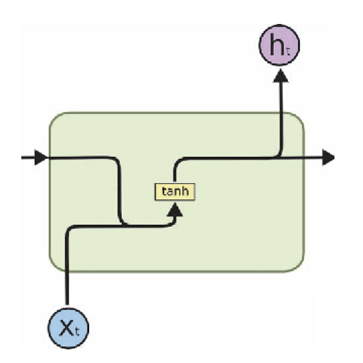
## LSTM CELL
#### LSTM cells have 3 output gates with the encoded information
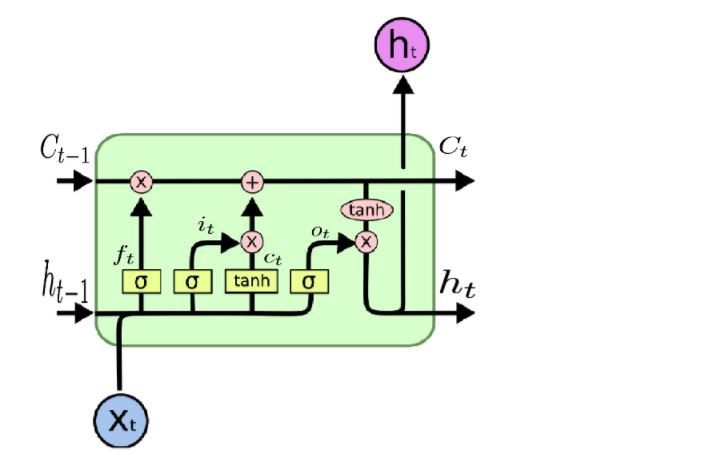
## GRU CELL
#### GRU cells have 2 output gates with the encoded information
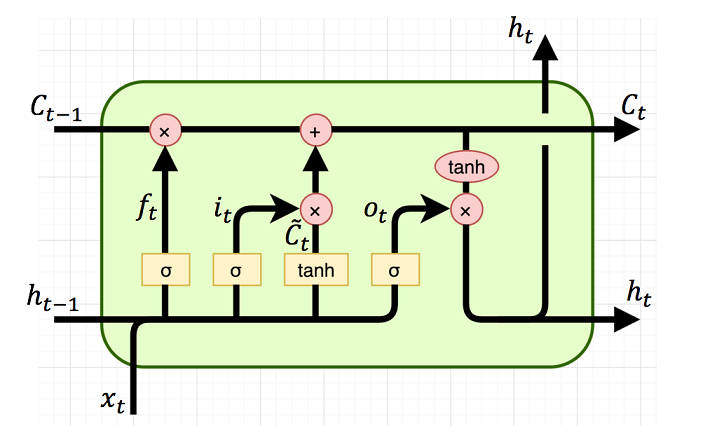

In [ ]:
### Editing the batch size  and training Epochs ###

#The following code is the one that starts the training of the neural network


input_data = [np.array(train_wavelengths), np.array(train_numerical)]


#Change the batch_size variable to batch_size = x, and replace x by your prefered batch size
#Change the epochse variable to epochs = x, and replace x by your prefered epochs number

model_history = model.fit(input_data, np.array(train_params), batch_size = 64, epochs = 10) 


## WARNING: DO NOT RUN THIS CODE, AS IT WILL START TRAINING THE MODEL AGAIN
## This is only to be run after you have defines your own neural network

In [ ]:
### Changing the neural network architecture ###


##############################################################################################
##############################################################################################    

num_time_steps = 300    #There are 300 points in each curve
num_inputs = 55         #There are 55 such curves (55 wavelenths)   #These variables dont change
num_vals =6             #6 stellar parameters


################################# - MODEL 1 - ####################################

# Change the number of neurons in the LSTM layers by editing the first number of the x1 or x2 variables.
#to add another layer after x1 and x2, copy and paste x1/x2 and replace the variable name with x3.
#Then replace the variable in brackets at the end of the command in brackets with the variable
#name of the previous layer, so in the following format:

## xn = LSTM(256, activation= 'relu',return_sequences=True)(X n-1)



# To change from LSTM to another rnn cell type, either replace LSTM with GRU, or with SimpleRNN.

#Remember that all the rnn cells should have return_sequences set to True except the last one should be set to false

inputx = Input(shape = (num_time_steps, num_inputs))  #Input #1, taking light curve data

x1 =  LSTM(256, activation= 'relu',return_sequences=True)(inputx)  #First LSTM layer (256 neurons)

x2 =  LSTM(256, activation= 'relu',return_sequences=False)(x1)     #Second LSTM layer (256 neurons)

modelx = Model(inputs=inputx, outputs=x2)  # Output of first model


################################ - MODEL 2 - #####################################

#Here, again you can change the number of neurons from 32 to another number

#Remember, the more layers and cells, the more training time

inputy = Input(shape = (num_vals,))  #Input #2, taking 6 stellar parameters

y1 =  Dense(32, activation='relu')(inputy)  #First DENSE layer (32 neurons)

y2 =  Dense(32, activation='relu')(y1)      #First DENSE layer (32 neurons)

modely = Model(inputs=inputy, outputs=y2)   # Output of second model


################################ - COMBINED MODEL - ##############################

# There is no need to change anything here

combined = concatenate([modelx.output, modely.output])  #Concatenating first and second model

z = Dense(64, activation="relu")(combined)  #Third DENSE layer, analysing combined results


z = Dense(55, activation="relu")(z)  # FINAL OUTPUT LAYER (55 outputs)

model = Model(inputs=[modelx.input, modely.input], outputs=z) #DEFINING FINAL MODEL'S INPUTS AND OUTPUT (2 Inputs, 1 Output)

##############################################################################################
##############################################################################################


### BONUS: Dropout layers (Decreasing Overfitting):

#### Overfitting is when the model does not generalize for the data, and learns patterns that are to complex, and only applicable to training dataset. It results the model to perform better by a significant amount on the train data than on the test data. This usually happens when the network structure is too complex and has been trained for too many Epochs

#### To keep the neural network from overfitting yet keep a complex network to analyze complex patterns, dropout layers are usefull

#### Dropout layers decrease number of less important connections between layers of network by a pre-defined percentage

In [37]:
### - Dropout Layers - ###

dropout1 = Dropout(0.2)(x1) #0.2, meaning it will cut down 20% of the connections between the 2 surrounding layers that are 
                            # Deemed least important

## Create your neural network in the following sections:

In [ ]:
#### - Neural Network architecture

new_model = 
















In [41]:
#### - Neural Network compilng 

model.compile(loss='mean_squared_error', optimizer='adam')

#Replace adam with: [sgd, adagrad, adadelta, RMSprop]

In [38]:
#### - Neural Network Training - ####

history_new = fit(input_data, np.array(train_params), batch_size =   , epochs =  ) 

## PLOT GRAPHS DEMONSTARTED FOR PREVIOUS BASIC MODEL

In [ ]:
plt.plot(history_new.history['val_loss'])

## FUTURE STEPS

### Entire dataset avilable (146 000 Datapoints): https://ariel-datachallenge.azurewebsites.net/ML

